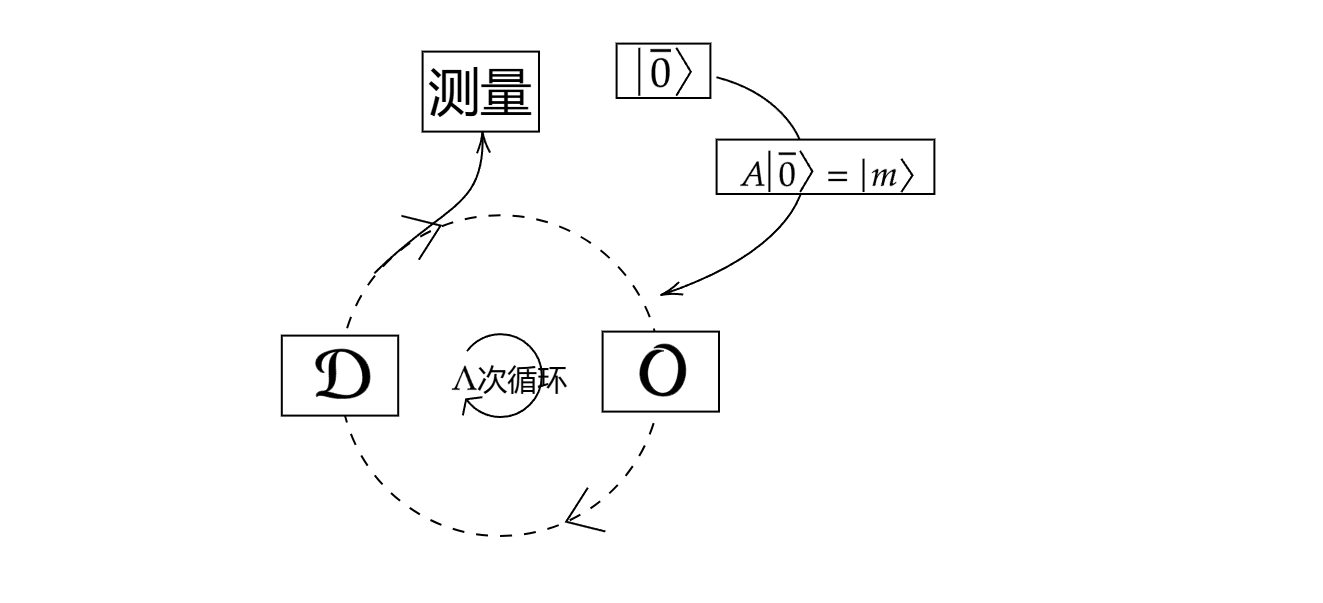


举例
- $n=2,\ket{m}=\frac{1}{\sqrt{2}}\ket{00}+\frac{1}{\sqrt{2}}\ket{01},\ket{Req}=0.9\ket{11}+0.3\ket{10}+0.3\ket{01}+0.1\ket{00}(a=0.1)$
- $n=3,\ket{m}=\frac{1}{\sqrt{2}}\ket{010}+\frac{1}{\sqrt{2}}\ket{100},\ket{Req}=\frac{\sqrt{3}}{8}\ket{000}+\frac{3}{8}\ket{001}+\frac{3}{8}\ket{010}+\frac{3\sqrt{3}}{8}\ket{011}+\frac{1}{8}\ket{100}+\frac{\sqrt{3}}{8}\ket{101}+\frac{\sqrt{3}}{8}\ket{110}+\frac{3}{8}\ket{111}(a=0.25)$

$$\ket{Req^p}=\sum_{x=0}^{N-1}Req_x^p\ket{x}$$
$$|Req_x^p|^2=a^{d_H(p,x)}(1-a)^{n-d_H(p,x)}$$


$$\omega=arccos(1-2Req_m^2)=2arcsin(Req_m)$$
$$\zeta_x=arccos(\frac{f_x}{\sqrt{f_x^2+g_x^2}})$$
$$\delta_x=\zeta_x+\phi-\omega/2$$
$$f_x=\frac{m_x}{Req_m}sin^2(\omega/2)+Req_x^p-2Req_mm_x=Req_x^p-m_xReq_m$$
$$g_x=\frac{m_x}{2Req_m}\sin{\omega}$$
$$A_x = \frac{B\sqrt{f_x^2+g_x^2}}{\cos{\omega/2}}$$

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve, minimize

In [ ]:
def d_hamming(a, b, n):
    # 转为二进制
    a_bin = bin(a)[2:]
    b_bin = bin(b)[2:]
    # 补全
    a_bin = '0'*(n-len(a_bin)) + a_bin
    b_bin = '0'*(n-len(b_bin)) + b_bin
    # 计算hamming距离
    d = 0
    for i in range(n):
        if a_bin[i] != b_bin[i]:
            d += 1
    return int(d)

def arctan_pi(x):
    if x >= 0:
        return np.arctan(x)
    else:
        return np.arctan(x) + np.pi
    

def cos_func(x, A, w, C, D):
    return A * np.cos(w * x + C) + D


def find_best_lambda(T, iter, offset=0):
    #在iter范围内计算最佳lambda满足 lambda=T(0.25+alpha) + offset,alpha为整数，使得lambda最接近整数
    best_lambda = None
    best_alpha = None
    min_difference = float('inf')  # 初始化最小差值为正无穷
    #alpha取值范围
    min_alpha = int( - offset / T - 0.25) - 1
    max_alpha = int((iter - offset) / T - 0.25) + 1
    
    
    # 遍历所有可能的alpha值
    for alpha in range(min_alpha, max_alpha + 1):
        # 计算lambda
        lambda_val = T * (0.25 + alpha) + offset
        # 找到最接近的整数
        nearest_int = round(lambda_val)
        # 计算与最近整数的差值
        difference = abs(lambda_val - nearest_int)
        print('alpha:', alpha, 'lambda:', lambda_val, 'nearest_int:', nearest_int, 'difference:', difference)
        
        # 如果这个差值比之前的最小差值还小，并且0<=lambda<iter, 更新最佳值
        if difference < min_difference and lambda_val >= 0 and lambda_val < iter:
            min_difference = difference
            best_lambda = lambda_val
            best_alpha = alpha
    return round(best_lambda), alpha, difference

# 离查询中心最近的记忆态下标
def find_nearest_memory(p, true_memo_ls):
    min_dis = float('inf')
    nearest_memories = []
    # 首先找到最小的汉明距离
    for i in range(len(true_memo_ls)):
        dis = d_hamming(p, true_memo_ls[i], n)
        if dis < min_dis:
            min_dis = dis
    
    # 然后收集所有具有最小汉明距离的下标
    print('min_dis:', min_dis)
    for i in range(len(true_memo_ls)):
        dis = d_hamming(p, true_memo_ls[i], n)
        if dis == min_dis:
            nearest_memories.append(true_memo_ls[i])
    
    return nearest_memories

def color_mapping(curve_data, num=10, rtol=1e-3, atol=1e-3):
    color_map = {}
    # 创建颜色映射字典
    N = len(curve_data)
    for i in range(N):
        if i not in color_map:
            if num == 10:
                color = plt.cm.tab10(i % 10)  # 使用tab10色彩方案，支持10种不同的颜色
            elif num == 20:
                color = plt.cm.tab20(i % 20)  # 使用tab20色彩方案，支持20种不同的颜色
            color_map[i] = color
            # 检查其他曲线是否与当前曲线重合
            for j in range(i + 1, N):
                if j not in color_map and np.allclose(curve_data[i], curve_data[j], rtol, atol):
                    color_map[j] = color
    return color_map

def standardize_popt(popt):
    # 统一 A 为正值，并将 phi 限制在 0 到 2π 之间
    if popt[0] < 0:
        popt[0] = -popt[0]
        popt[2] = (popt[2] + np.pi) % (2 * np.pi)
    if popt[2] > 2 * np.pi:
        popt[2] -= 2 * np.pi
    if popt[2] < 0:
        popt[2] += 2 * np.pi
    return popt

<>:78: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:78: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
C:\Users\24521\AppData\Local\Temp\ipykernel_29160\2627597018.py:78: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  color = f"plt.cm.tab{num}"(i % num)  # 使用tab20色彩方案，支持20种不同的颜色


In [162]:
def Oracle(astate, target):
    for i in range(len(target)):
        j = int(target[i])
        astate[j] = -astate[j]
    return astate

def Oracle_r(astate, req_vec):
    return astate - 2 * np.dot(astate, req_vec) * req_vec

def Oracle_m1(astate, m_vec):
    for i in range(len(m_vec)):
        if m_vec[i] != 0:
            astate[i] = -astate[i]
    return astate

def Oracle_m2(astate, req_new_vec):
    return Oracle_r(astate, req_new_vec)

def Oracle_c(astate, target, alpha):
    for i in range(len(target)):
        j = int(target[i])
        astate[j] = np.exp(1j * alpha) * astate[j]
    return astate

#----------------------------------------------

def Diffusion(astate, s_vec):
    return 2 * np.dot(astate, s_vec) * s_vec - astate

def Diffusion_r(astate, m_vec):
    return 2 * np.dot(astate, m_vec) * m_vec - astate

def Diffusion_c(astate, s_vec, beta):
    return (1 - np.exp(1j * beta)) * np.dot(astate, s_vec) * s_vec + np.exp(1j * beta) * astate











$$\begin{align} Oracle:a_x&\to a_x -2\langle a|Req^p\rangle Req_x^p \\
Diffusion:a_x&\to 2\langle a|m\rangle m_x-a_x\end{align}$$

In [163]:
mode = 'Ezhov' # 'Grover', 'Ventura', 'Ventura_0', 'Ezhov', 'Improved_1', 'Improved_2', 'Panchi', 'Rigui'

exclude = 0
n = 4 #2 #3 #4 #9
a = 0.15 #0.1 #0.25
target = [3,7]  #3 #[6,7]#[3,7] #[4,5] #[5,15,24]



true_memo_ls = [0,3,6,9,12,13,15] #[2, 4]#[0,1]#[0,3,6,9,12,15]#0,3,6,9,12,13,15#[0,3,4,6]#[23, 59, 61, 110]#[2,4,7,9,12,18,24,33,37,45,57,60,220]

iter = 25
show_p0 = 0
fitting = 1
use_p0 = 1

new_a = 0.15

In [164]:
N = 2**n
p = target[0]
if mode == 'Grover':
    true_memo_ls = range(N)
m_vec = np.zeros(N)
true_m_vec = np.zeros(N)
req_vec = np.zeros(N)
req_sqr = np.zeros(N)
true_memo_size = len(true_memo_ls)


# 目标集合对应向量
P = len(target)
target_vec = np.zeros(N)
for i in target:
    target_vec[i] = 1/np.sqrt(P)

# Rigui下初始向量
if mode == 'Rigui':
    if 2*P > N:
        raise ValueError('目标集合大小超过N/2')
    psi0_vec = np.zeros(N, dtype=complex)
    cnt = 0
    for i in range(P):
        psi0_vec[target[i]] = 1/np.sqrt(2*P)
    for i in range(N):
        if i not in target:
            if cnt < P:
                psi0_vec[i] = 1/np.sqrt(2*P)
                cnt += 1
            else:
                break

            

# 创建一个n维归一化向量，每个元素都相等
s_vec = np.ones(N) / np.sqrt(N)

for i in range(true_memo_size):
    true_m_vec[true_memo_ls[i]] = 1/np.sqrt(true_memo_size)

if exclude:
    for i in range(N):
        if i not in true_memo_ls:
            m_vec[i] = 1/np.sqrt(N-true_memo_size)
else:
    m_vec = true_m_vec


In [165]:
if mode == 'Ezhov' or mode == 'Improved_1' or mode == 'Improved_2':
    # 生成req
    for i in range(N):
        req_sqr[i] = a**d_hamming(i, p, n) * (1-a)**(n-d_hamming(i, p, n))
        req_vec[i] = np.sqrt(req_sqr[i])
    # 计算均值
    sum_req = np.sum(req_vec)
    mean_req = sum_req / N
    sum_memo = np.sum(m_vec)  
    req_m = np.dot(m_vec, req_vec) 



    omega = 2*np.arcsin(req_m) #np.arccos(1-2*req_m**2)
    T = 2 * np.pi / omega


    zeta_vec = np.zeros(N)
    delta_vec = np.zeros(N)
    f_vec = np.zeros(N)
    g_vec = np.zeros(N)
    A_vec = np.zeros(N)
    h_vec = np.zeros(N)

    # 解方程组
    def equations(vars):
        B, phi = vars
        eq1 = 1 + B * (np.cos(phi - omega) - np.cos(phi)) / (2 * req_m)
        eq2 = B * np.cos(phi) - np.dot(m_vec, req_vec)
        return [eq1, eq2]

    # 目标函数
    def objective(vars):
        return np.sum(np.square(equations(vars)))

    # 约束条件
    constraints = [{'type': 'ineq', 'fun': lambda vars: vars[0]}]  # B > 0

    # 初始猜测值
    initial_guess = [1, 1]

    # 使用 minimize 求解方程组
    result = minimize(objective, initial_guess, constraints=constraints)

    if result.success:
        B, phi = result.x
        print(f'Solution found: B = {B}, phi = {phi}')
    else:
        raise ValueError('No solution found')


    for i in range(N): 
        g_vec[i] = m_vec[i] * np.sin(omega) / (2 * req_m)
        f_vec[i] = req_vec[i] - m_vec[i] * req_m
        h_vec[i] = np.sqrt(f_vec[i]**2 + g_vec[i]**2)
        zeta_vec[i] = arctan_pi(g_vec[i] / f_vec[i])
        delta_vec[i] = zeta_vec[i] + phi -omega/2
        delta_vec[i] = delta_vec[i] % (2 * np.pi)
        A_vec[i] = B * h_vec[i] / np.cos(omega/2)

elif mode == 'Ventura' or mode =='Ventura_0' or mode == 'Grover':
    theta = np.arcsin(np.sqrt(P/N))
    omega = 2 * theta
    T = 2 * np.pi / omega
    lmd_approx = round(np.sqrt(N/P) * np.pi / 4)
    print('T:', T, 'omega:', omega)

Solution found: B = 0.999984408571891, phi = -1.0534805002511212


In [166]:
# 算法流程
req_new_vec = np.zeros(N)
req_new_sqr = np.zeros(N)

if mode == 'Panchi':
    astate = s_vec.copy().astype(complex)
elif mode == 'Rigui':
    astate = psi0_vec.copy()
else:
    astate = m_vec.copy()

a_his = np.zeros((iter, N), dtype=complex)
a_mid_his = np.zeros((iter, N), dtype=complex)

a_his[0] = astate
a_mid_his[0] = astate

if mode == 'Ezhov':
    for i in range(1,iter):
        astate = Oracle_r(astate, req_vec)
        a_mid_his[i] = astate
        astate = Diffusion_r(astate, m_vec)
        a_his[i] = astate

elif mode == 'Grover':
    for i in range(1,iter):
        astate = Oracle(astate, target)
        a_mid_his[i] = astate
        astate = Diffusion(astate, s_vec)
        a_his[i] = astate
        
elif mode == 'Ventura':
    astate = Oracle(astate, target)
    print('astate:', astate)
    a_mid_his[1] = astate
    astate = Diffusion(astate, s_vec)
    a_his[1] = astate
    astate = Oracle_m1(astate, m_vec)
    a_mid_his[2] = astate
    astate = Diffusion(astate, s_vec)
    a_his[2] = astate
    # 计算offset
    k = np.arcsin(np.dot(astate, target_vec)) / theta
    
    for i in range(3,iter):
        astate = Oracle(astate, target)
        a_mid_his[i] = astate
        astate = Diffusion(astate, s_vec)
        a_his[i] = astate

elif mode == 'Ventura_0':
    astate = Oracle(astate, target)
    a_mid_his[1] = astate
    astate = Diffusion_r(astate, m_vec)
    a_his[1] = astate
    astate = Oracle_m1(astate, m_vec)
    a_mid_his[2] = astate
    astate = Diffusion_r(astate, m_vec)
    a_his[2] = astate
    # 计算offset
    k = np.arcsin(np.dot(astate, target_vec)) / theta
    
    for i in range(3,iter):
        astate = Oracle(astate, target)
        a_mid_his[i] = astate
        astate = Diffusion_r(astate, m_vec)
        a_his[i] = astate

elif mode == 'Improved_1':
    astate = Oracle_r(astate, req_vec)
    a_mid_his[1] = astate
    astate = Diffusion_r(astate, m_vec)
    a_his[1] = astate
    astate = Oracle_m1(astate, m_vec)
    a_mid_his[2] = astate
    astate = Diffusion_r(astate, m_vec)
    a_his[2] = astate
    for i in range(3,iter):
        astate = Oracle_r(astate, req_vec)
        a_mid_his[i] = astate
        astate = Diffusion_r(astate, m_vec)
        a_his[i] = astate

elif mode == 'Improved_2':
    # 生成req_new
    for i in range(N):
        req_new_sqr[i] = 0
        for j in range(N):
            if j in true_memo_ls:
                req_new_sqr[i] += new_a**d_hamming(i, j, n) * (1-new_a)**(n-d_hamming(i, j, n))
        req_new_sqr[i] = req_new_sqr[i] / true_memo_size
        req_new_vec[i] = np.sqrt(req_new_sqr[i])

    astate = Oracle_r(astate, req_vec)
    a_mid_his[1] = astate
    astate = Diffusion_r(astate, m_vec)
    a_his[1] = astate
    astate = Oracle_m2(astate, req_new_vec)
    a_mid_his[2] = astate
    astate = Diffusion_r(astate, m_vec)
    a_his[2] = astate
    for i in range(3,iter):
        astate = Oracle_r(astate, req_vec)
        a_mid_his[i] = astate
        astate = Diffusion_r(astate, m_vec)
        a_his[i] = astate
        
elif mode == 'Panchi':
    for i in range(1,iter):
        astate = Oracle_c(astate, target, np.pi/2)
        a_mid_his[i] = astate
        astate = Diffusion_c(astate, s_vec, -np.pi/2)
        a_his[i] = astate

elif mode == 'Rigui':
    for i in range(1,iter):
        astate = Oracle_c(astate, target, np.pi/2)
        a_mid_his[i] = astate
        astate = Diffusion_c(astate, psi0_vec, -np.pi/2)
        a_his[i] = astate

x_data = range(iter)
x_data_expand = np.linspace(0, iter, 2000)

y_data = a_his.T
x_data_cut = x_data[2:]
y_data_cut = y_data[:, 2:]


curve_data = {}
curve_p0 = {}
fit_params = []


# 拟合曲线
for i in range(N):
    
    if fitting:
        if (mode == 'Ventura' or mode == 'Improved_1' or mode == 'Improved_2'):
            x_data_fit = x_data_cut
            y_data_fit = y_data_cut
        else:
            x_data_fit = x_data
            y_data_fit = y_data

        if use_p0:
            if mode == 'Ezhov':
                p0 = [A_vec[i], omega, delta_vec[i], 0]
            elif mode == 'Ventura_0':
                p0 = [1, omega, np.arccos(y_data[i][0]), 0]
            else:
                p0 = [1, omega, 0, 0]

            popt, _ = curve_fit(cos_func, x_data_fit, y_data_fit[i], p0=p0)
            y_p0 = cos_func(x_data_expand, *p0)  # 根据p0参数生成的曲线
            curve_p0[i] = y_p0
            standardize_popt(popt)
            fit_params.append((p0, popt))

        else:
            popt, _ = curve_fit(cos_func, x_data_fit, y_data_fit[i])
            standardize_popt(popt)
            fit_params.append(popt)
        

        

        y_fit = cos_func(x_data_expand, *popt)
        curve_data[i] = y_fit

    else:
        curve_data[i] = y_data[i]



color_map = color_mapping(curve_data, rtol=1e-1, atol=1e-1)

C:\Users\24521\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:628: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
C:\Users\24521\AppData\Local\Temp\ipykernel_29160\3331328337.py:154: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(cos_func, x_data_fit, y_data_fit[i], p0=p0)
C:\Users\24521\AppData\Local\Temp\ipykernel_29160\2627597018.py:78: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  color = f"plt.cm.tab{num}"(i % num)  # 使用tab20色彩方案，支持20种不同的颜色
C:\Users\24521\AppData\Local\Temp\ipykernel_29160\2627597018.py:78: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  color = f"plt.cm.tab{num}"(i % num)  # 使用tab20色彩方案，支持20种不同的颜色


TypeError: 'str' object is not callable

In [ ]:
#计算成功率
lmd,alpha,diff,acc = 0,1e-10,1e-10,1e-10


if mode == 'Ezhov' or mode == 'Improved_1' or mode == 'Improved_2':
    target = find_nearest_memory(p,true_memo_ls)
    lmd,alpha,diff = find_best_lambda(T,iter)

elif mode == 'Grover':
    lmd,alpha,diff = find_best_lambda(T,iter, -0.5)
    
elif mode == 'Ventura' or mode == 'Ventura_0':
    T0 = np.pi * np.sqrt(N) / 4
    print('T0:',T0)
    offset = 2 - k/2
    
    lmd,alpha,diff = find_best_lambda(T,iter,offset)
    print('lmd:',lmd, 'alpha:',alpha, 'diff:',diff, 'offset', offset, T * (0.25 + alpha) + offset)
    

acc_m_vec = np.zeros(iter)
acc_target_vec = np.zeros(iter)

if mode == 'Improved_1' and exclude:
    lmd = 20
    T = 11.0
elif mode == 'Improved_2' and exclude:
    lmd = 10
elif mode == 'Panchi':
    lmd = 1
    T = 0.5
elif mode == 'Rigui':
    lmd = 1
    T = 0.5
    

for i in range(iter):
    for j in true_memo_ls:
        acc_m_vec[i] += np.abs(a_his[i][j])**2
    for j in target:
        acc_target_vec[i] += np.abs(a_his[i][j])**2

acc = acc_target_vec[lmd]
    

min_dis: 0
alpha: -1 lambda: -4.5542436938538735 nearest_int: -5 difference: 0.4457563061461265
alpha: 0 lambda: 1.5180812312846244 nearest_int: 2 difference: 0.48191876871537564
alpha: 1 lambda: 7.590406156423121 nearest_int: 8 difference: 0.40959384357687867
alpha: 2 lambda: 13.662731081561619 nearest_int: 14 difference: 0.33726891843838125
alpha: 3 lambda: 19.735056006700116 nearest_int: 20 difference: 0.26494399329988383
alpha: 4 lambda: 25.807380931838615 nearest_int: 26 difference: 0.19261906816138463


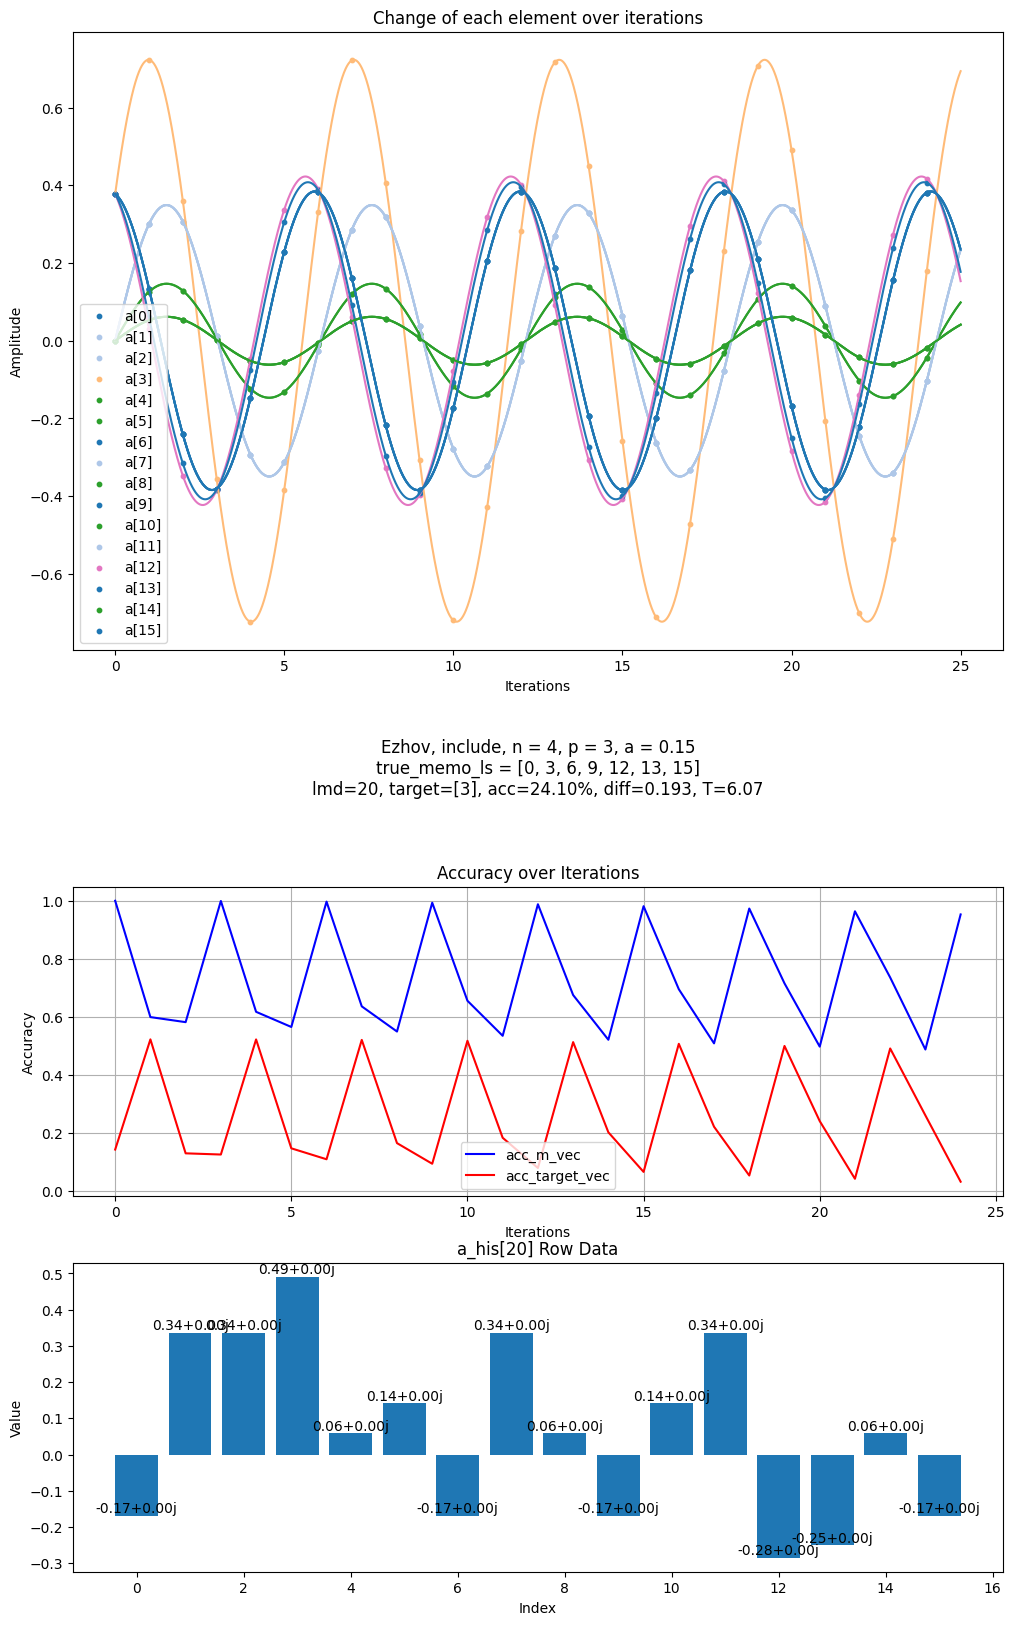

In [ ]:
# 创建图形和子图
fig = plt.figure(figsize=(12, 20))
gs = fig.add_gridspec(4, 1, height_ratios=[6, 1, 3, 3])

# 绘制曲线的子图
ax1 = fig.add_subplot(gs[0])
for i in range(N):
    if N <= 20:
        ax1.scatter(x_data, y_data[i], color=color_map[i], label=f'a[{i}]', s=10)
    elif i in true_memo_ls or i in target or i == p:
        ax1.scatter(x_data, y_data[i], color=color_map[i], label=f'a[{i}]', s=10)
    else:
        ax1.scatter(x_data, y_data[i], color=color_map[i], s=5)
    if fitting:
        ax1.plot(x_data_expand, curve_data[i], color=color_map[i])
        if show_p0:
            ax1.plot(x_data_expand, curve_p0[i], color=color_map[i], linestyle='--')
    else:
        #折线图
        ax1.plot(x_data, y_data[i], color=color_map[i])

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Amplitude')
ax1.set_title('Change of each element over iterations')
ax1.legend()

# 添加显示信息的子图
ax_info = fig.add_subplot(gs[1])
ax_info.axis('off')

exclude_text = 'exclude' if exclude else 'include'

if mode == 'Improved_2':
    info_text = f'{mode}, {exclude_text}, n = {n}, p = {p}, a = {a}\ntrue_memo_ls = {true_memo_ls}\nnew_a = {new_a}\nlmd={lmd}, target={target}, acc={acc:.2%}, diff={diff:.3}, T={T:.3}'

elif mode == 'Ventura' or mode == 'Ventura_0':
    info_text = f'{mode}, {exclude_text}, n = {n}\ntrue_memo_ls = {true_memo_ls}\nlmd={lmd}, target={target}, acc={acc:.2%}, diff={diff:.3}, T={T:.3}'

else:
    info_text = f'{mode}, {exclude_text}, n = {n}, p = {p}, a = {a}\ntrue_memo_ls = {true_memo_ls}\nlmd={lmd}, target={target}, acc={acc:.2%}, diff={diff:.3}, T={T:.3}'

ax_info.text(0.5, 0.5, info_text, ha='center', va='center', fontsize=12)

# 创建表格数据并格式化数值
table_data = []
if use_p0:
    for i, (p0, popt) in enumerate(fit_params):
        formatted_p0 = [f'{val:.3e}' for val in p0]
        formatted_popt = [f'{val:.3e}' for val in popt]
        combined = [val for pair in zip(formatted_p0, formatted_popt) for val in pair]
        table_data.append([f'a[{i}]', *combined])




#     # 绘制表格的子图
#     ax2 = fig.add_subplot(gs[2])
#     ax2.axis('tight')
#     ax2.axis('off')
#     table = ax2.table(cellText=table_data, colLabels=['Curve', 'p0_A', 'fit_A', 'p0_omega', 'fit_omega', 'p0_delta', 'fit_delta', 'p0_D', 'fit_D'], cellLoc='center', loc='center')
#     table.auto_set_font_size(False)
#     table.set_fontsize(10)
#     table.scale(1.2, 1.2)

# 绘制正确率曲线
ax2 = fig.add_subplot(gs[2])
ax2.plot(range(len(acc_m_vec)), acc_m_vec, label='acc_m_vec', color='blue')
ax2.plot(range(len(acc_target_vec)), acc_target_vec, label='acc_target_vec', color='red')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over Iterations')
ax2.legend()
ax2.grid(True)


# 绘制a_his第lmd行中所有数据的柱状图
if lmd in range(iter):
    ax3 = fig.add_subplot(gs[3])
    bars = ax3.bar(range(N), a_his[lmd])
    ax3.set_xlabel('Index')
    ax3.set_ylabel('Value')
    ax3.set_title(f'a_his[{lmd}] Row Data')

    # 在柱状图上显示数值
    for bar in bars:
        yval = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

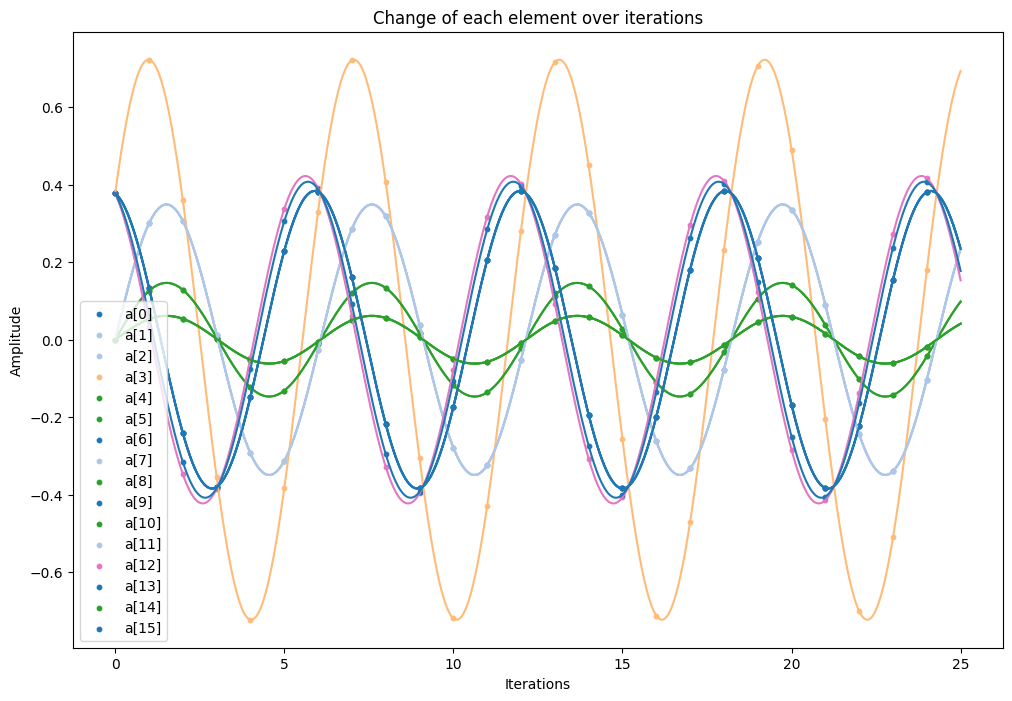

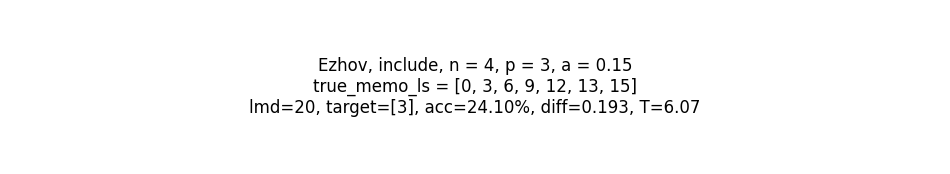

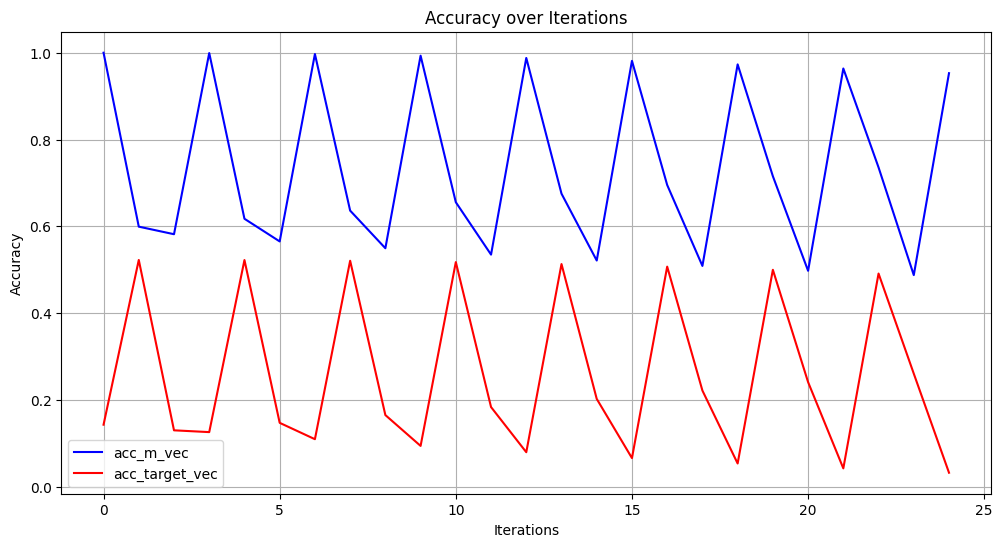

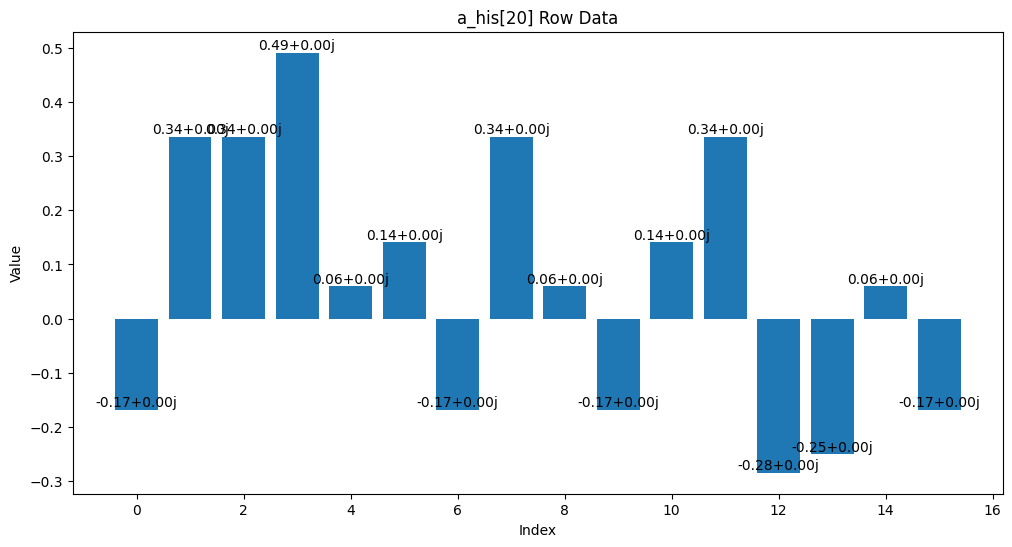

In [ ]:
# 绘制曲线的子图
fig1, ax1 = plt.subplots(figsize=(12, 8))
for i in range(N):
    if N <= 20:
        ax1.scatter(x_data, y_data[i], color=color_map[i], label=f'a[{i}]', s=10)
    elif i in true_memo_ls or i in target or i == p:
        ax1.scatter(x_data, y_data[i], color=color_map[i], label=f'a[{i}]', s=10)
    else:
        ax1.scatter(x_data, y_data[i], color=color_map[i], s=5)
    if fitting:
        ax1.plot(x_data_expand, curve_data[i], color=color_map[i])
        if show_p0:
            ax1.plot(x_data_expand, curve_p0[i], color=color_map[i], linestyle='--')
    else:
        ax1.plot(x_data, y_data[i], color=color_map[i])

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Amplitude')
ax1.set_title('Change of each element over iterations')
ax1.legend()


# 添加显示信息的子图
fig2, ax_info = plt.subplots(figsize=(12, 2))
ax_info.axis('off')

exclude_text = 'exclude' if exclude else 'include'

if mode == 'Improved_2':
    info_text = f'{mode}, {exclude_text}, n = {n}, p = {p}, a = {a}\ntrue_memo_ls = {true_memo_ls}\nnew_a = {new_a}\nlmd={lmd}, target={target}, acc={acc:.2%}, diff={diff:.3}, T={T:.3}'
elif mode == 'Ventura' or mode == 'Ventura_0':
    info_text = f'{mode}, {exclude_text}, n = {n}\ntrue_memo_ls = {true_memo_ls}\nlmd={lmd}, target={target}, acc={acc:.2%}, diff={diff:.3}, T={T:.3}'
else:
    info_text = f'{mode}, {exclude_text}, n = {n}, p = {p}, a = {a}\ntrue_memo_ls = {true_memo_ls}\nlmd={lmd}, target={target}, acc={acc:.2%}, diff={diff:.3}, T={T:.3}'

ax_info.text(0.5, 0.5, info_text, ha='center', va='center', fontsize=12)


# 绘制正确率曲线
fig3, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(range(len(acc_m_vec)), acc_m_vec, label='acc_m_vec', color='blue')
ax2.plot(range(len(acc_target_vec)), acc_target_vec, label='acc_target_vec', color='red')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over Iterations')
ax2.legend()
ax2.grid(True)



# 绘制a_his第lmd行中所有数据的柱状图
if lmd in range(iter):
    fig4, ax3 = plt.subplots(figsize=(12, 6))
    bars = ax3.bar(range(N), a_his[lmd])
    ax3.set_xlabel('Index')
    ax3.set_ylabel('Value')
    ax3.set_title(f'a_his[{lmd}] Row Data')

    # 在柱状图上显示数值
    for bar in bars:
        yval = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')



In [ ]:
print(acc_m_vec[1], acc_target_vec[1])
print(acc_m_vec[lmd_approx], acc_target_vec[lmd_approx])
print(lmd_approx)
print(np.abs(a_his[50][24])**2)

0.5992227811754808 0.5224651082928089
0.5817835801600475 0.1298965919363732
2


IndexError: index 50 is out of bounds for axis 0 with size 25

In [ ]:
# # 绘制正确率曲线
# _
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(acc_m_vec)), acc_m_vec, label='acc_m_vec', color='blue')
# plt.plot(range(len(acc_target_vec)), acc_target_vec, label='acc_target_vec', color='red')
# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.title('Accuracy over Iterations')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# 存储a_his数据为csv文件
# np.savetxt('./output/a_his.csv', a_his, delimiter=',')


In [ ]:
# w1 = 2*np.arcsin(1/np.sqrt(2)/2)
# T1 = 2 * np.pi / w1
# w1, T1
# list = [-0.137, 0.0231, -0.876, 0.301, -0.292, -0.137, -0.137, 0.0231]
# s1 = np.sum(np.square(list))
# list = list / np.sqrt(s1)

